<a href="https://colab.research.google.com/github/agrawalyeshu0506/Python_HandsOn/blob/main/foodhub_prject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

The dataset provided is from the city of New York and contains the data of different orders made by the registered customers in the online portal of food aggregator company named as FoodHub. The goal is to perform the detailed data analysis of the dataset to find answers to these questions that will help the FoodHub improve its business.


### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below.


*   order_id: Unique ID of the order

*   customer_id: ID of the customer who ordered the food

*   restaurant_name: Name of the restaurant

*   cuisine_type: Cuisine ordered by the customer

*   cost_of_the_order: Cost of the order

*   day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

*   rating: Rating given by the customer out of 5

*   food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

*   delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information








### Let us start by importing the required libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/foodhub_order.csv')

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data.shape

(1898, 9)

#### Observations:

There are 1898 rows and 9 columns present in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical columns in the data and 4 object type columns.
*   rating column is being read as object type column but it should be in numerical format.
*   food_preparation_time and delivery_time columns are in numerical format as they are displaying time in minutes.




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

*   There are no missing values in the data. But, I can see there are lots of orders that are not rated.
*   38.77% orders are not rated in the dataset.






### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
# Making a list of all categorical variables
cat_cols =  ['restaurant_name','cuisine_type','rating','day_of_the_week']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
--------------------------------

In [ ]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True, ascending= False))
    print("-" * 50)

restaurant_name
Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Rye House                   0.001
Hiroko's Place              0.001
Frank Restaurant            0.001
Sarabeth's West             0.001
'wichcraft                  0.001
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
cuisine_type
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: proportion, dtype: float64
--------------------------------------------------
rating
Not given   0.388
5           0.310
4           0.203
3           0.099
Name: proportio

#### Observations:

* `food_preparation_time:`The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20 mins, 27 mins and 35 mins respectively.

* `cost_of_the_order:` on average, the cost of the order is 16.5 dollars
with minimum cost of the order is 4.47$ and maximum is 35.4%.

* `delivery_time:`The minimum, average, and maximum time it takes for food to be delivered once an order is prepared are 15 mins, 24 mins and 33 mins respectively.

* `rating:` The majority of orders remain unrated, but the available ratings in the dataset range from 3 to 5.

* `restaurant_name:` The dataset includes 178 restaurants, with Shake Shack receiving the highest number of orders through the FoodHub online app.

* `customer_id:`The dataset reveals that customers are repeat buyers, with individual customers placing multiple orders through FoodHub.

* `cuisine_type:` The dataset contains 14 types of cuisine, with American cuisine being the most frequently ordered.

* `day_of_the_week:` 71% of the orders get placed during weekend.






### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data[data['rating']=='Not given']['order_id'].count()

np.int64(736)

#### Observations:

736 orders are not rated. Almost 38.7% orders are not rated in the dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Let's check the distribution for numerical columns.**

**Observations on cost of the order**

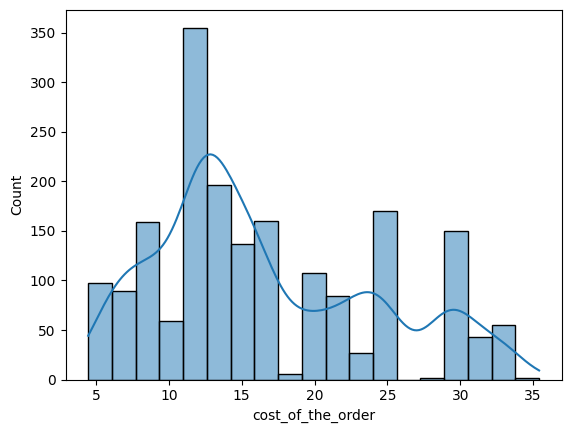

In [ ]:
histplot = sns.histplot(data=data, x = 'cost_of_the_order', kde=True);

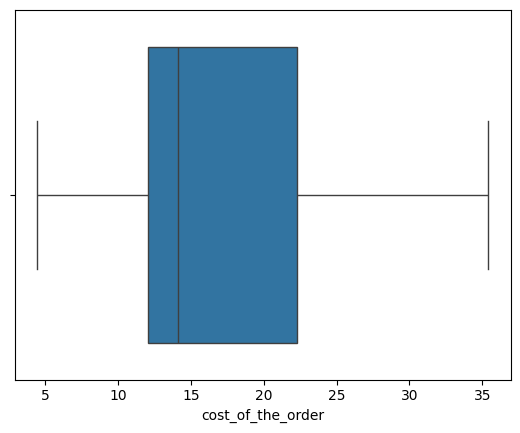

In [ ]:
boxplot = sns.boxplot(data, x = 'cost_of_the_order');

* The distribution is skewed towards right for cost of the order.
* No outliers present in this column.
* 340 of the orders cost within the range of 12 to 13 dollars

**Observations on food preparation time**

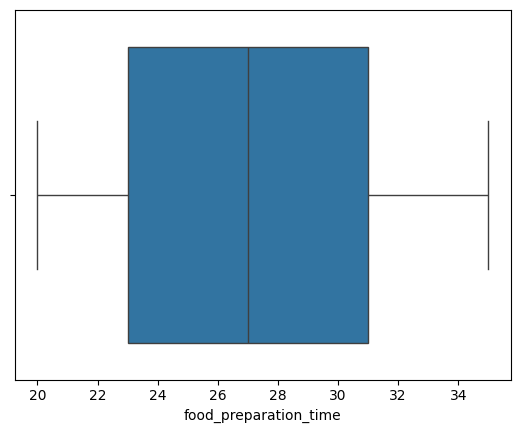

In [ ]:
boxplot = sns.boxplot(data=data, x = 'food_preparation_time');

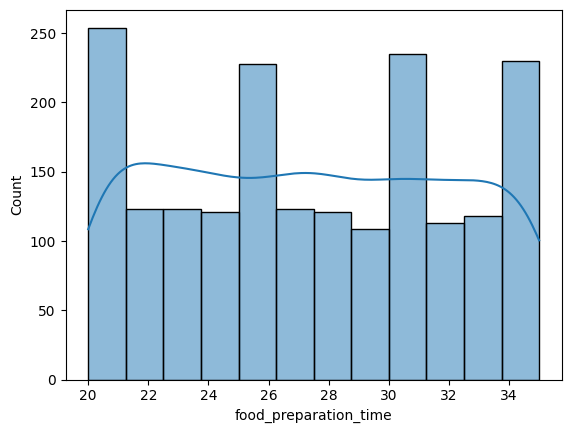

In [ ]:
sns.histplot(data, x = 'food_preparation_time', kde=True);

* No outliers present in this column.
* preparation time of food ranges from 20 to 35 minutes.

**Observations on food delivery time**

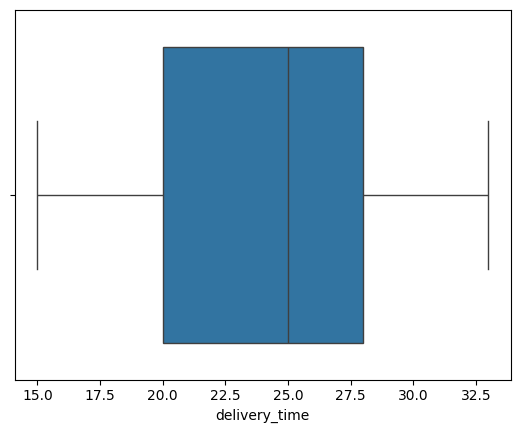

In [ ]:
boxplot = sns.boxplot(data=data, x = 'delivery_time');

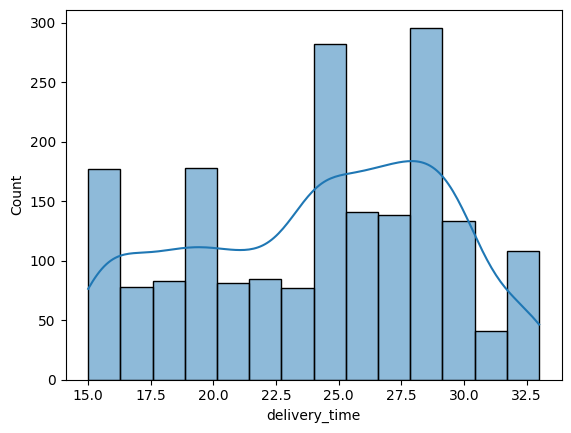

In [ ]:
sns.histplot(data, x = 'delivery_time', kde=True);

* No outliers present in this column.
* Delivery time of food ranges from 15 to 33 minutes.
* Delivery time of maximum orders ranges from 25 to 30 minutes.

**Let's check the distribution for Category columns.**

**Observations on rating of orders**

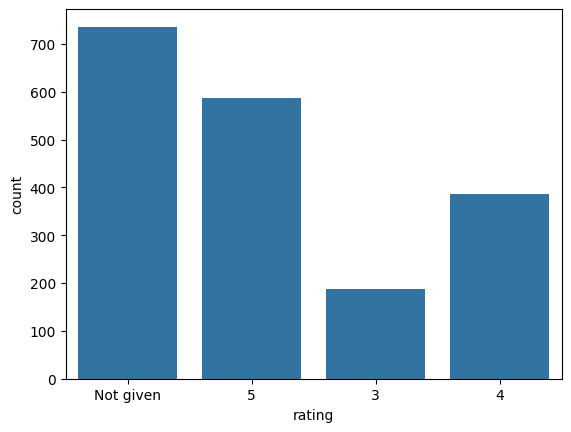

In [ ]:
bar = sns.countplot(data, x = 'rating');

*   736 orders are not rated in the dataset.
*   rating of the orders ranges from 3 to 5.
*   None of the order received less than 3 rating.



**Observations on fday of the week(weekend/weekday)**

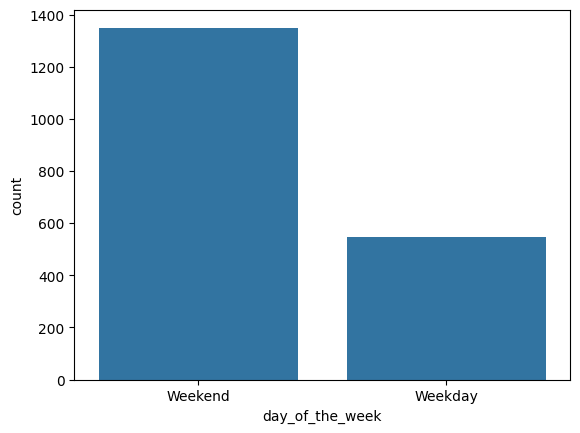

In [ ]:
bar = sns.countplot(data, x = 'day_of_the_week');

*   Order volume is significantly higher on weekends compared to weekdays.
*   1351 orders out of 1898 placed over the weekends.



**Observations on cuisine type**

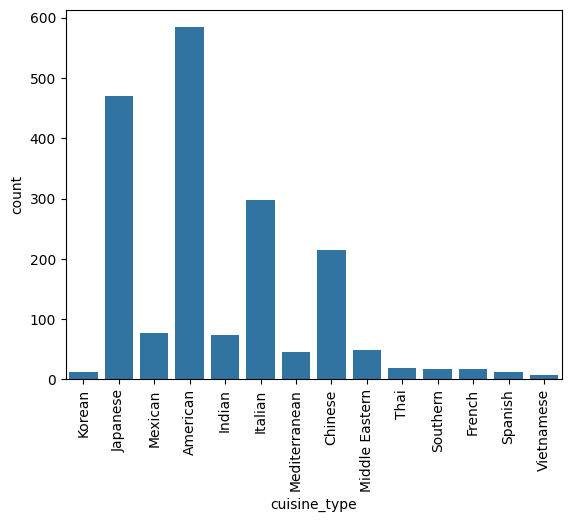

In [ ]:
sns.countplot(data, x = 'cuisine_type');
plt.xticks(rotation=90);

*   The dataset indicates that the restaurant provides 14 cuisine categories in New York City, among which American cuisine records the highest number of orders followed by Japanese.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
data['restaurant_name'].value_counts(ascending=False)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


#### Observations:

The top 5 restaurants in terms of the number of orders received are:

*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
data.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False)

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:

 The most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
order_percentage = (data[data['cost_of_the_order']>20]['order_id'].count()/(data.shape[0]))*100
print(order_percentage)


29.24130663856691


#### Observations:

29.2% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
data['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:

The mean order delivery time is 24.1%.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
data['customer_id'].value_counts(ascending=False)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


#### Observations:

The IDs of the top 3 customers and the number of orders they placed are:
*   52832 with 13 orders
*   47440 with 10 orders
*   83287 with 9 orders





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


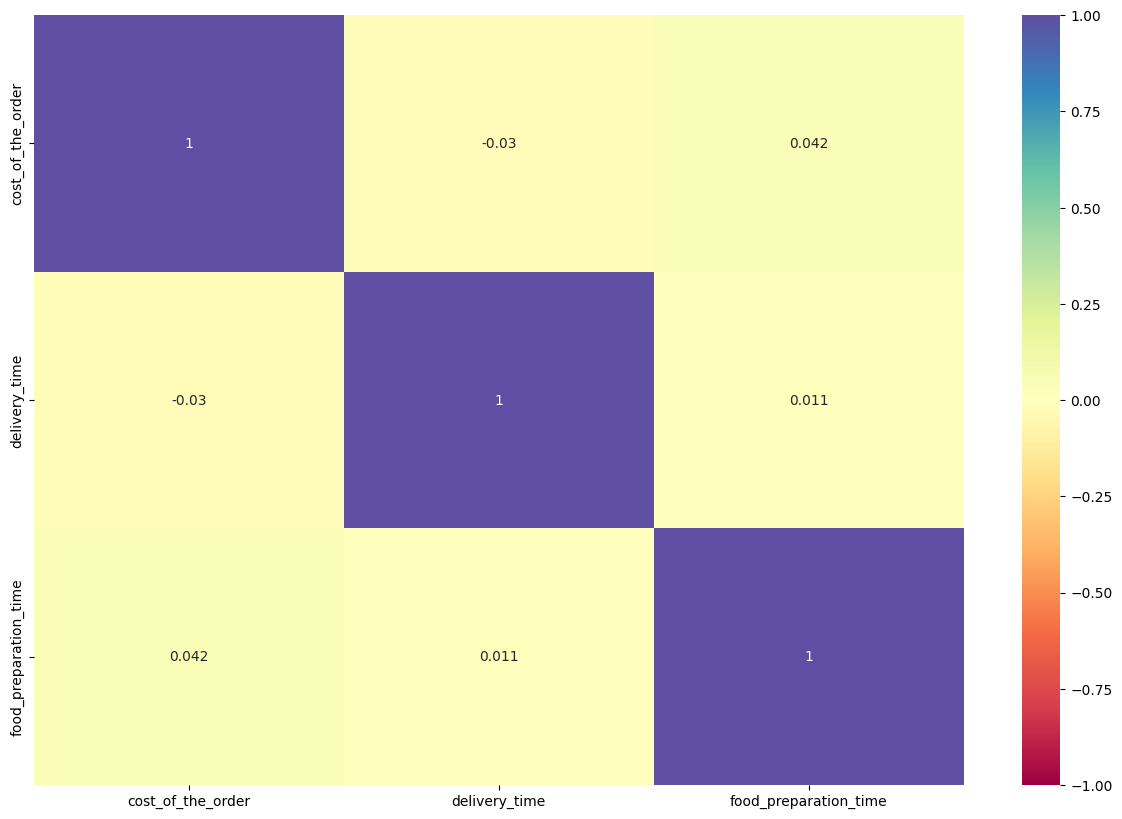

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data[['cost_of_the_order','delivery_time','food_preparation_time']].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

### Observations:
- No strong correlation is visible across the dataset’s numerical columns.
- We expected prep time and order cost to be linked, but the heatmap shows just 4%.




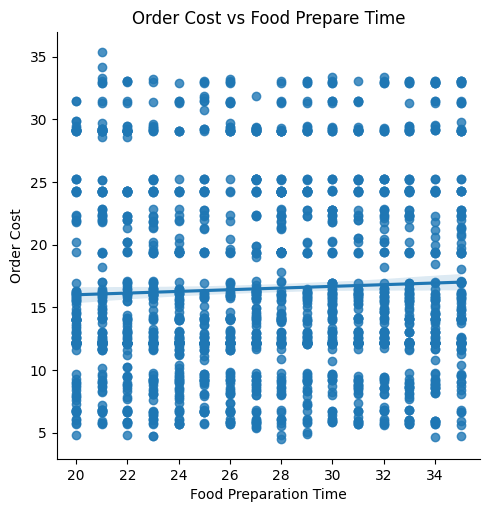

In [ ]:
sns.lmplot(data, y="cost_of_the_order", x="food_preparation_time");
plt.title('Order Cost vs Food Prepare Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Order Cost')
plt.show();

The data indicates that food preparation time remains nearly constant across all orders, regardless of their cost.

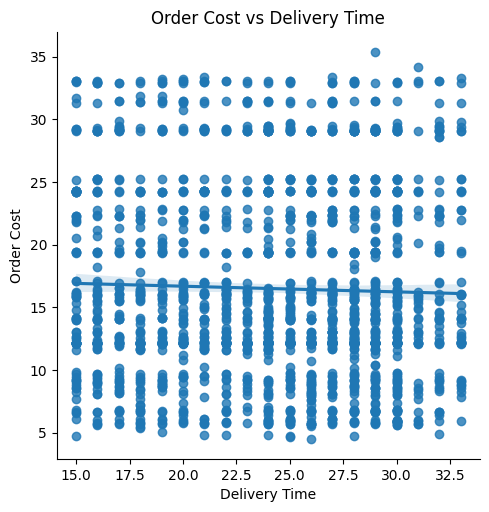

In [ ]:
sns.lmplot(data=data, y="cost_of_the_order", x="delivery_time");
plt.title('Order Cost vs Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Order Cost')
plt.show();

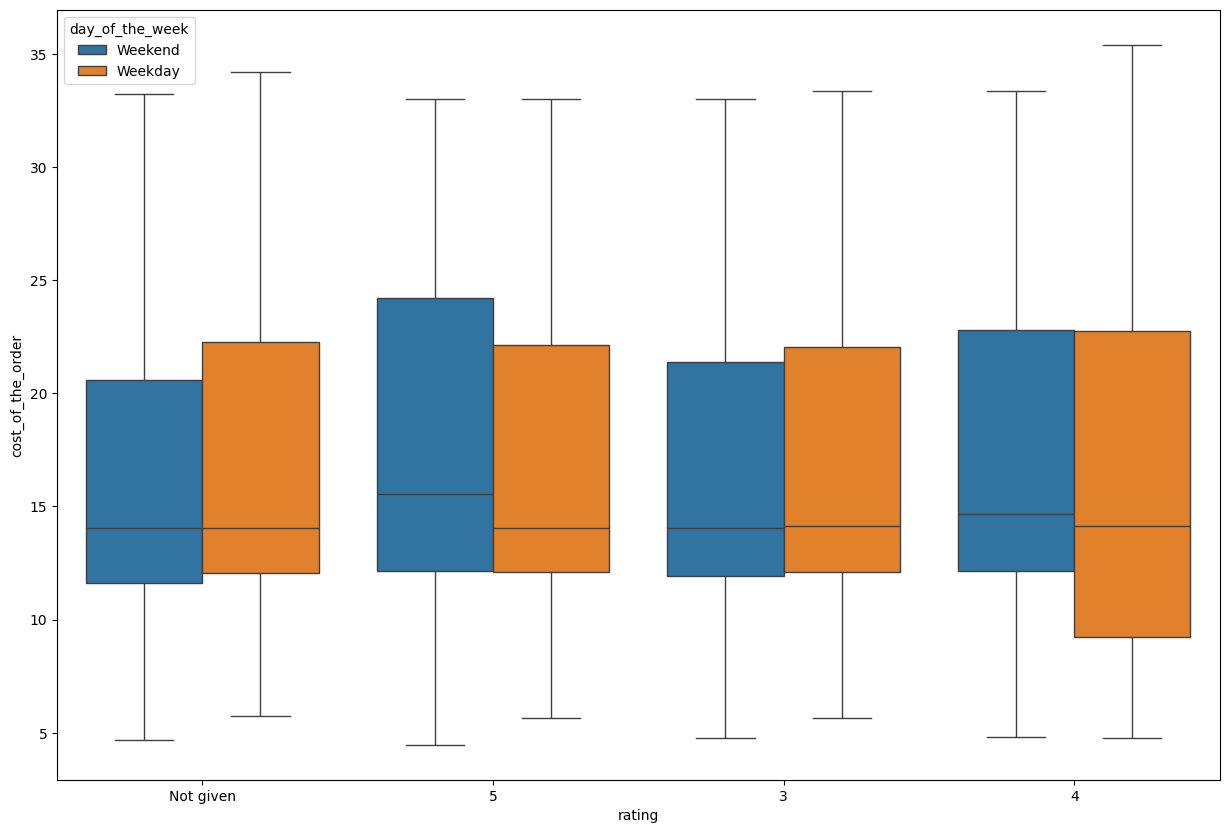

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='rating', y = 'cost_of_the_order', hue='day_of_the_week')

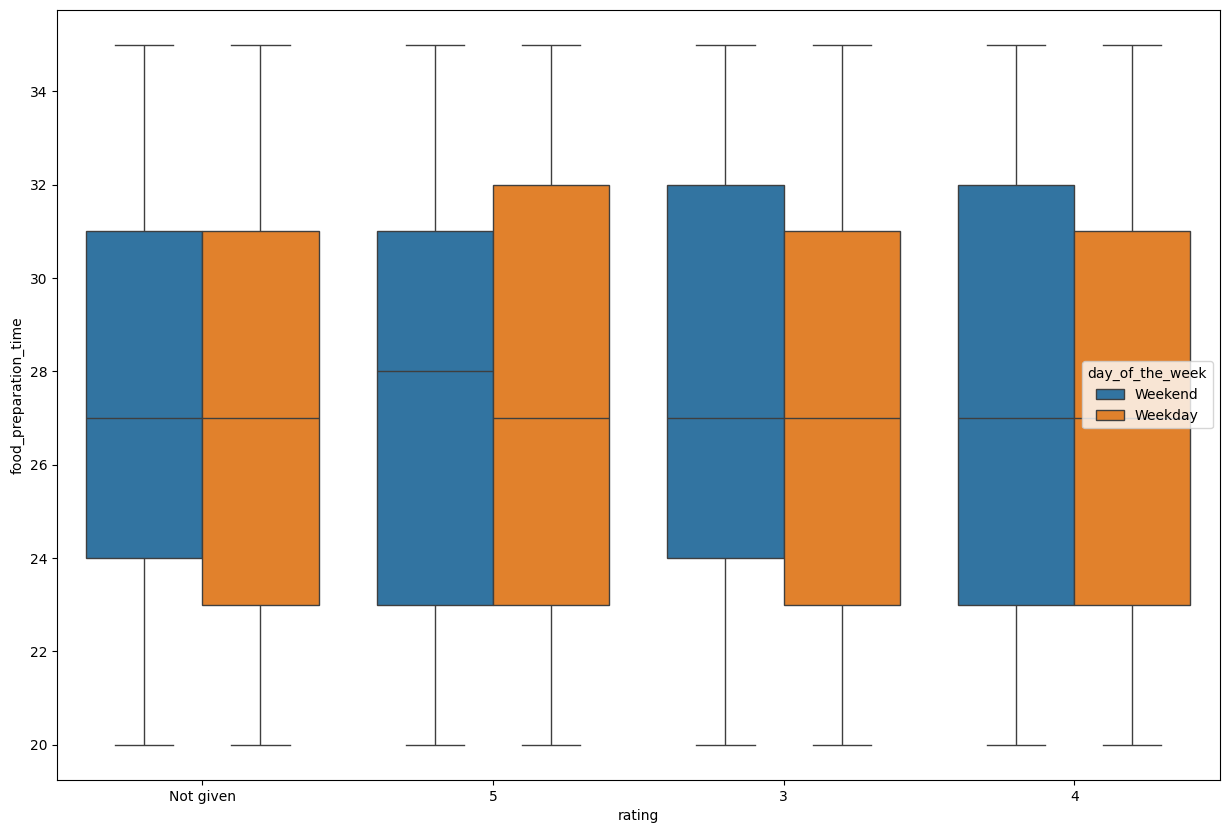

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='rating', y = 'food_preparation_time', hue= 'day_of_the_week')

Customer ratings show no dependency on food prepare duration.

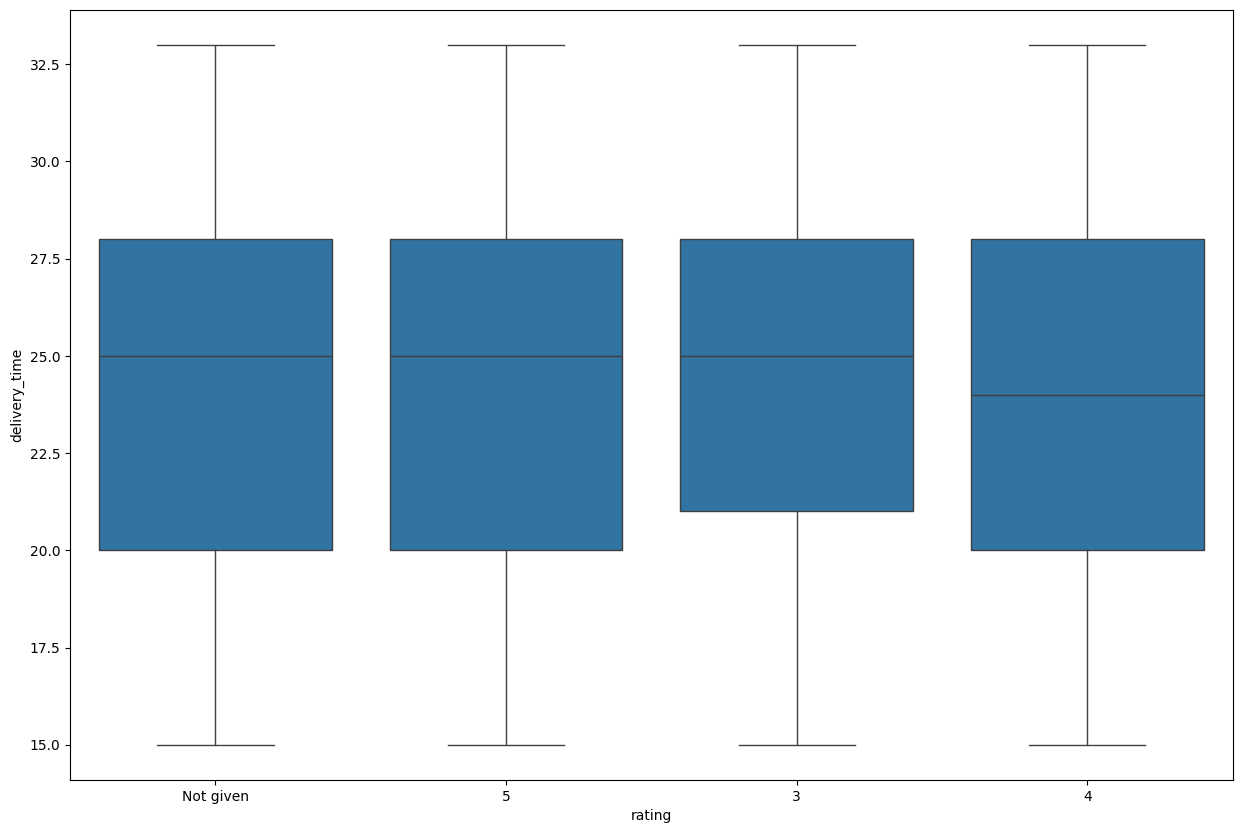

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='rating', y = 'delivery_time');

 - Customer ratings show dependency on delivery duration.
 - Orders with a 3-star rating usually take longer to deliver than those rated 4 or 5 stars.


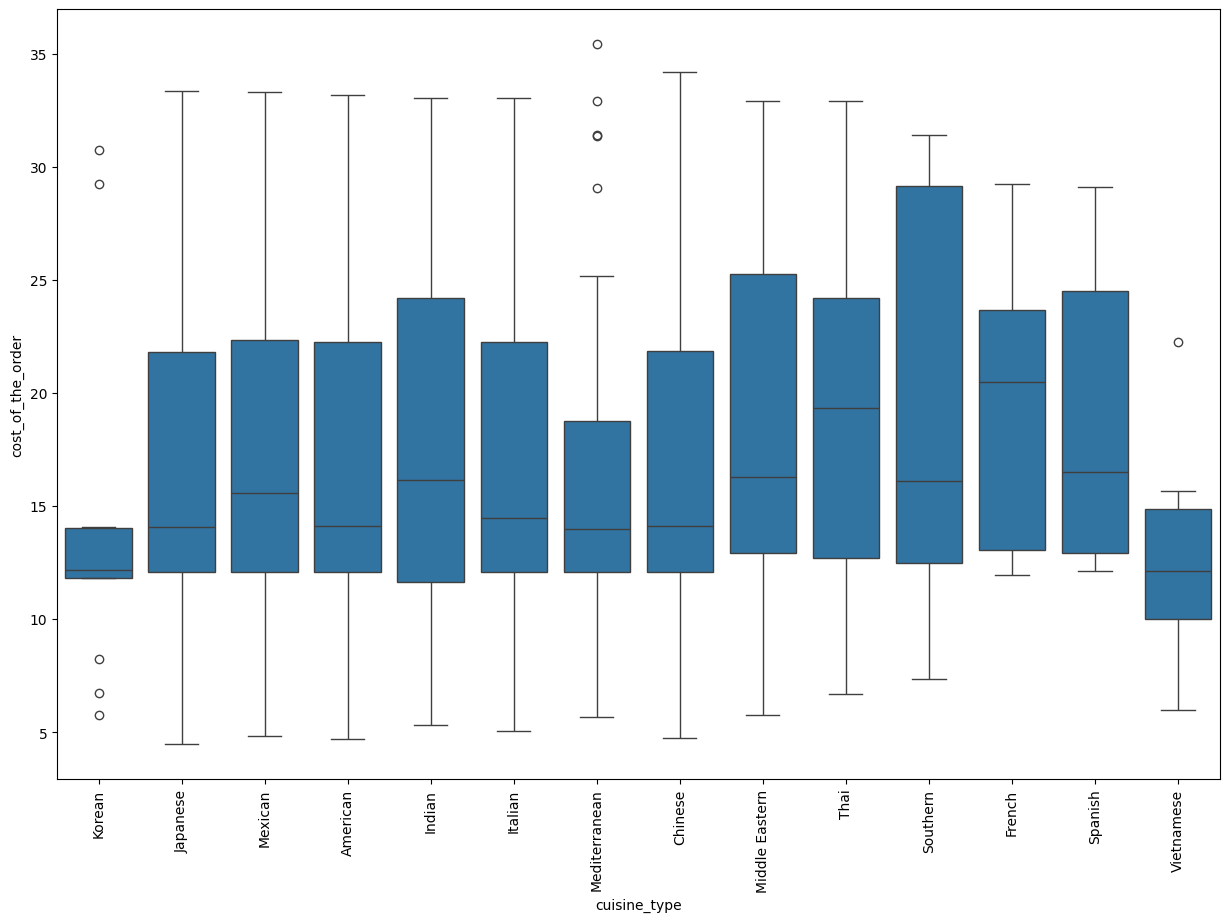

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data, x ='cuisine_type', y = 'cost_of_the_order');
plt.xticks(rotation=90);

- The cost of Korean food shows outliers on both the side whereas Mediterranean and Vietnamese food show outliers on one side.
- The cost of Spanish cuisine orders is the highest among all food types, followed by French cuisine.


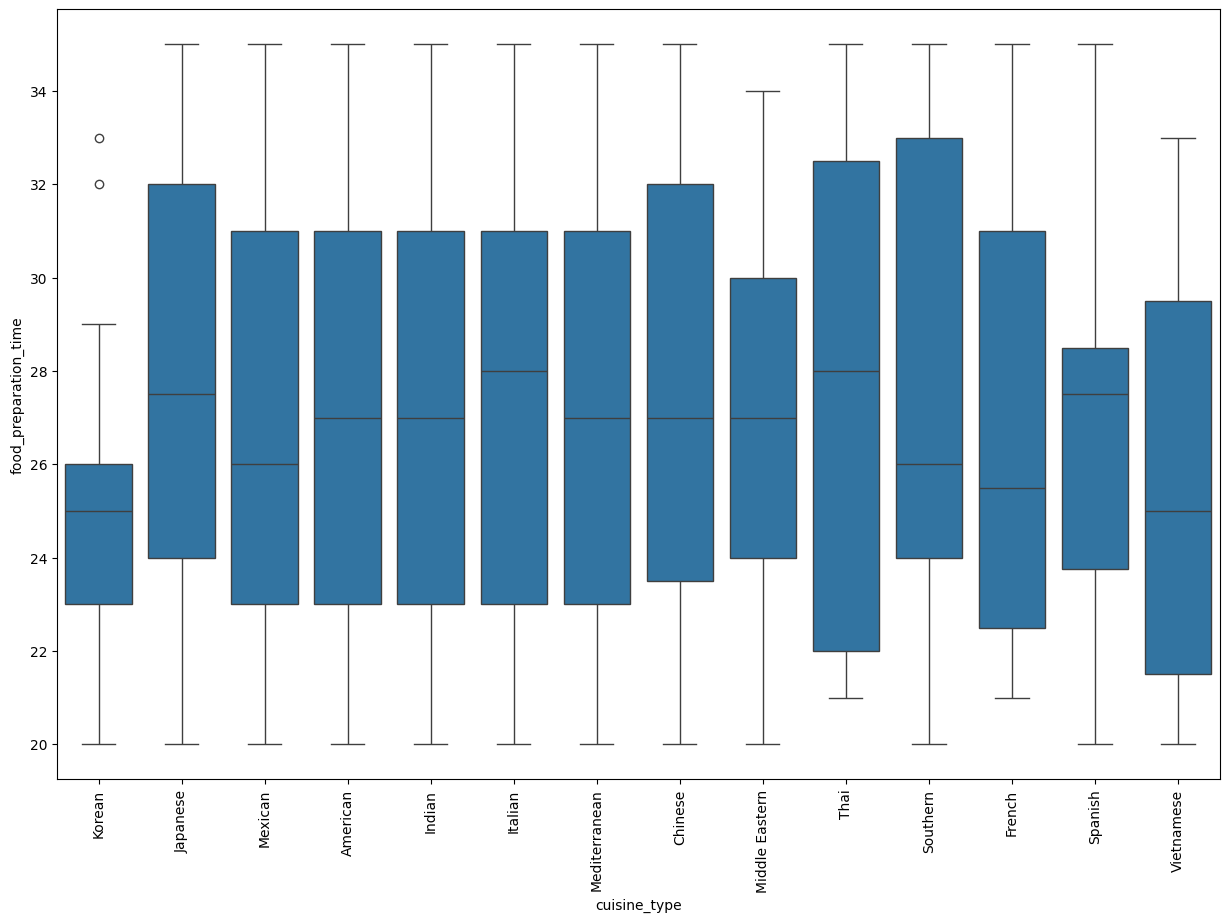

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='cuisine_type', y = 'food_preparation_time');
plt.xticks(rotation=90);

Preparing '*Thai*' and '*French*' cuisine orders requires a minimum of 21 minutes, which is longer than the preparation time for all other cuisine orders.

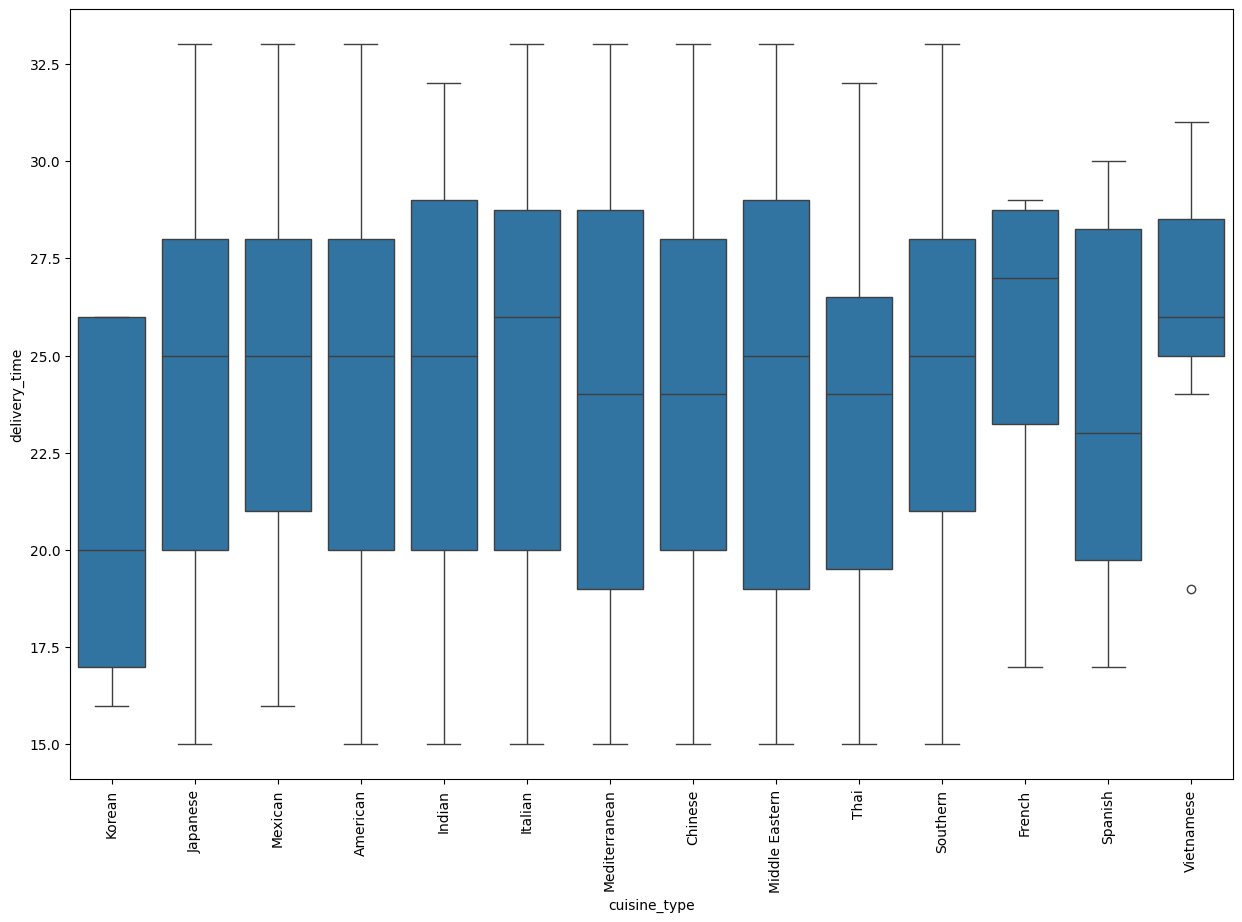

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data, x ='cuisine_type', y = 'delivery_time');
plt.xticks(rotation=90);

- Delivering Vietnamese cuisine requires a minimum of 19 minutes.
- Every order is delivered within 33 minutes.


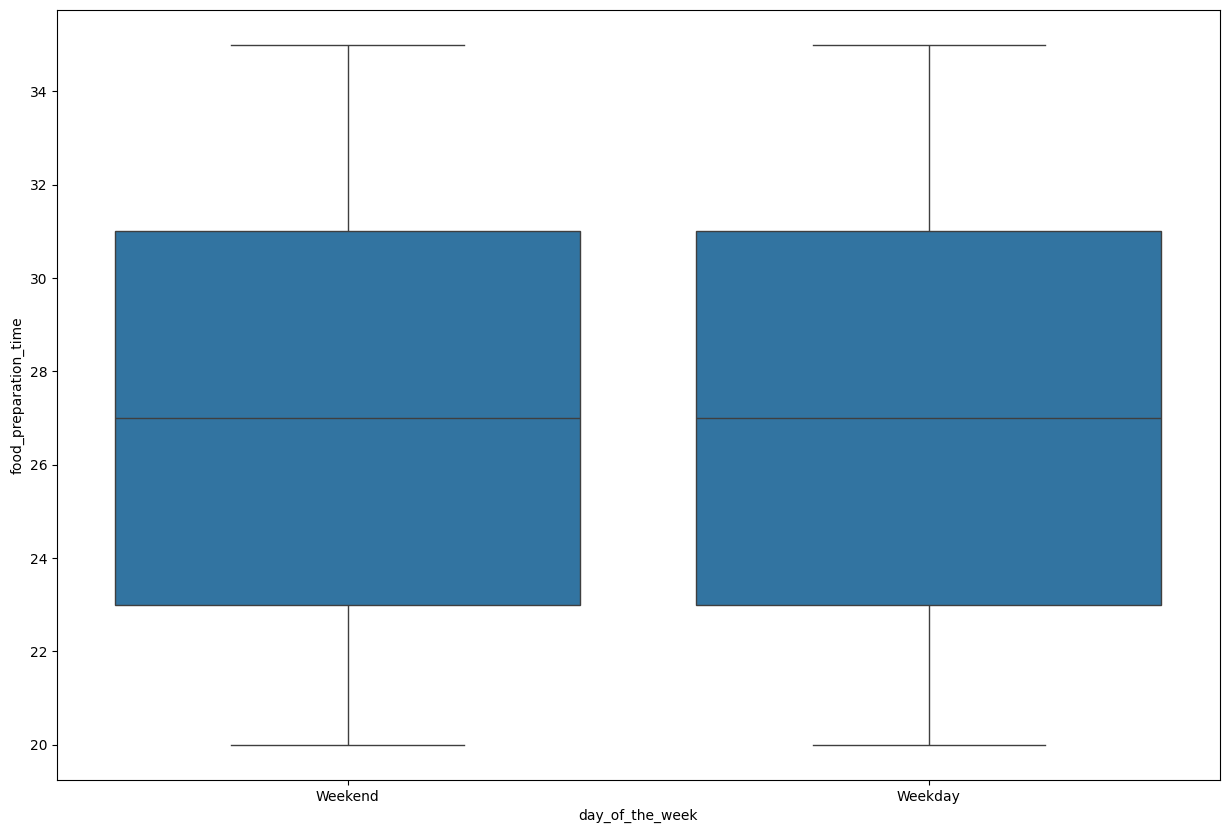

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='day_of_the_week', y = 'food_preparation_time');

The food preparation time remains consistent across all days, showing no variation between weekdays and weekends.

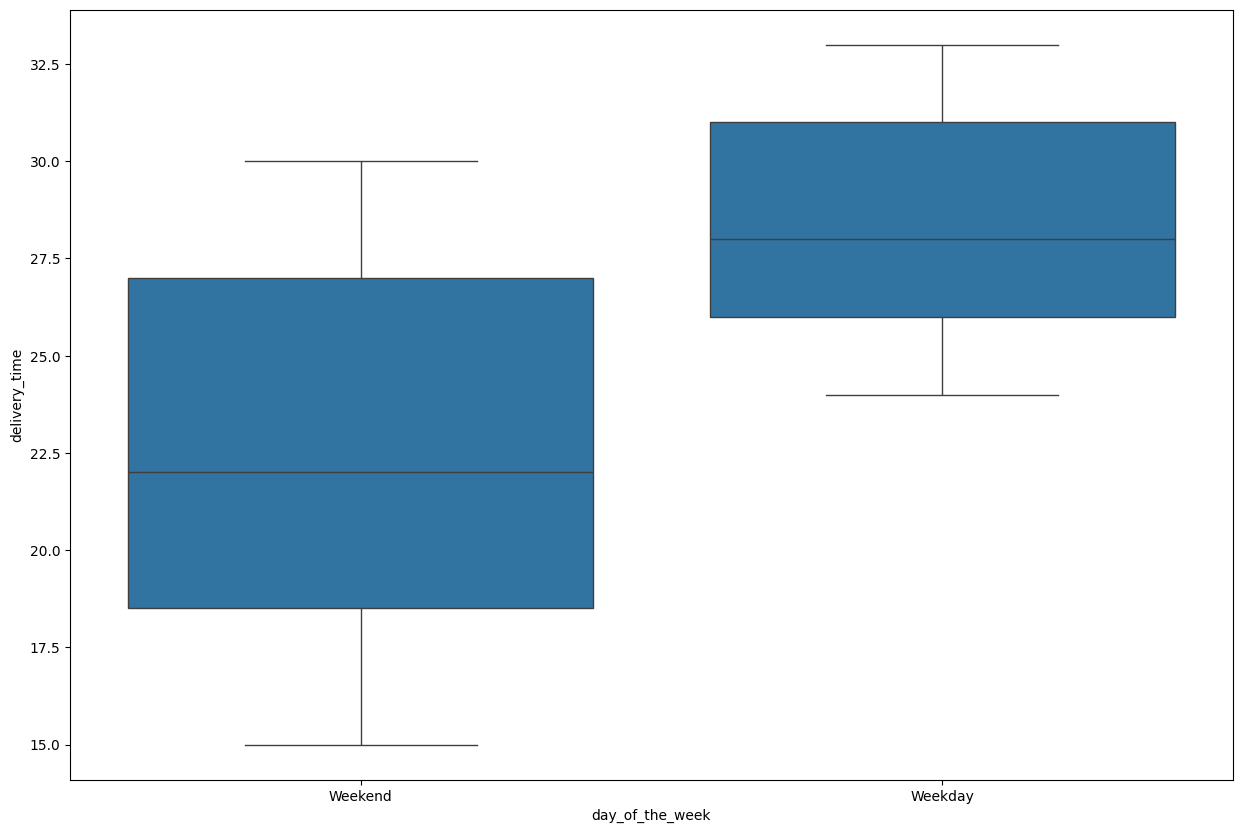

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='day_of_the_week', y = 'delivery_time');

The delivery time for orders is generally longer on weekdays compared to weekends.

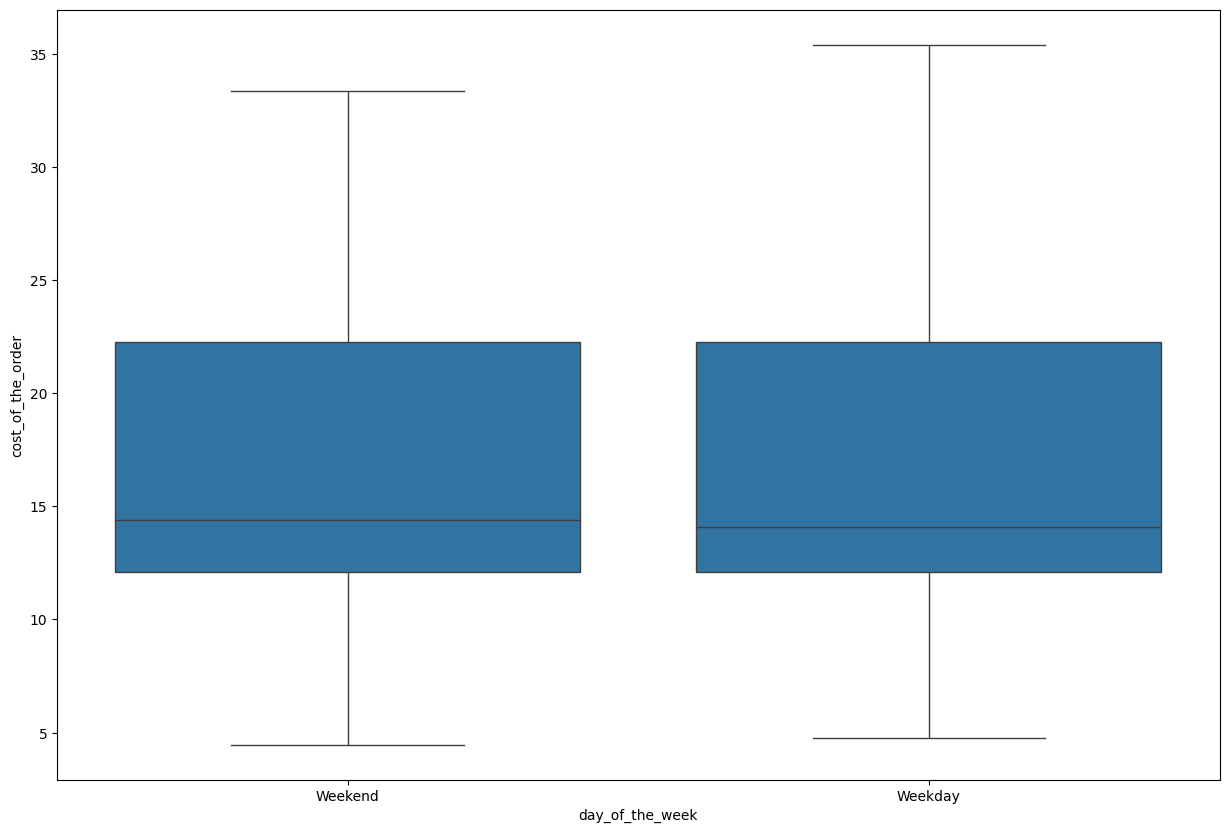

In [ ]:
plt.figure(figsize=(15,10))
box = sns.boxplot(data, x ='day_of_the_week', y = 'cost_of_the_order');

Order costs show the same range on weekdays and weekends.

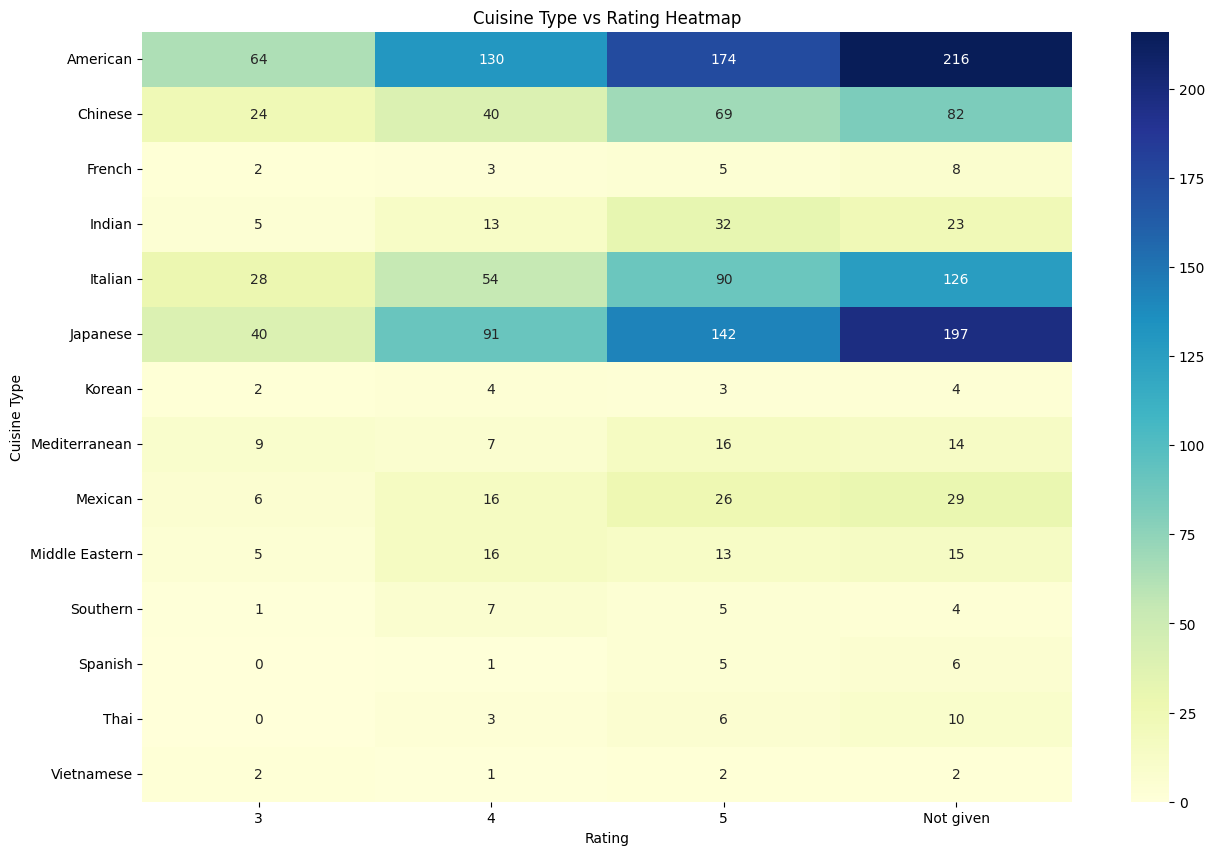

In [ ]:
crosstab = pd.crosstab(data['cuisine_type'], data['rating'])
plt.figure(figsize=(15,10))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Cuisine Type vs Rating Heatmap")
plt.ylabel("Cuisine Type")
plt.xlabel("Rating")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rated_data = data[data['rating']!='Not given'].copy()
rated_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30


In [ ]:
rated_data['rating'] = rated_data['rating'].astype(int)

In [ ]:
restaurant_rating_count = rated_data.groupby(['restaurant_name'])['rating'].count()
restaurant_rating_count

,rating
restaurant_name,
'wichcraft,1
12 Chairs,2
5 Napkin Burger,2
67 Burger,1
Amma,2
...,...
Zero Otto Nove,1
brgr,1
da Umberto,1


In [ ]:
restaurant_average_rating = rated_data.groupby(['restaurant_name'])['rating'].mean()
restaurant_average_rating

,rating
restaurant_name,
'wichcraft,5.000
12 Chairs,4.500
5 Napkin Burger,4.000
67 Burger,5.000
Amma,4.500
...,...
Zero Otto Nove,4.000
brgr,3.000
da Umberto,5.000


In [ ]:
resataurant_rating_summary = pd.DataFrame({'count': restaurant_rating_count, 'mean': restaurant_average_rating})
resataurant_rating_summary

,count,mean
restaurant_name,,
'wichcraft,1,5.000
12 Chairs,2,4.500
5 Napkin Burger,2,4.000
67 Burger,1,5.000
Amma,2,4.500
...,...,...
Zero Otto Nove,1,4.000
brgr,1,3.000
da Umberto,1,5.000


In [ ]:
resataurant_rating_summary.loc[(resataurant_rating_summary['count']>50) & (resataurant_rating_summary['mean']>4)]

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328
Blue Ribbon Sushi,73,4.219
Shake Shack,133,4.278
The Meatball Shop,84,4.512


#### Observations:

There are 4 restaurants that have a rating count of more than 50 and the average rating should be greater than 4 that are listed below:
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = (data[data['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25)+ (data[data['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15)
print(revenue)

8379.539499999999


#### Observations:

If the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.The net revenue generated by the company across all orders is $8379.5.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
data['order_deivery_time'] = data['food_preparation_time']+ data['delivery_time']

In [ ]:
(data[data['order_deivery_time']>60]['order_id'].count())/data.shape[0]*100

np.float64(10.537407797681771)

#### Observations:

10.5% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
data.groupby(['day_of_the_week'])['order_deivery_time'].mean()

,order_deivery_time
day_of_the_week,
Weekday,55.552
Weekend,49.907


#### Observations:

*   The mean delivery time in weekdays and weekends is 55.55 and 49.90 mins respectively.
*   The delivery time is lesser in weekend as compare to Weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* A large portion of customers on the Food Hub app do not provide ratings for their orders, with approximately 38% of orders remaining unrated.
- Order volumes are considerably higher during weekends compared to weekdays, as 71% of all orders are placed over the weekend.
- Delivery times tend to be longer on weekdays than on weekends, suggesting that many companies are situated farther from the central areas of New York City.
- The majority of people in New York City prefer American cuisine.
- Japanese food ranks second in popularity, followed by Italian and Chinese cuisines.
- The top 3 popular restaurant in the city of new York are Shake Shack, The Meatball Shop and Blue Ribbon Sushi.





### Recommendations:

- if 38% of orders remain unrated, that’s a big gap in customer feedback which limits Food Hub’s ability to improve service quality and build trust. so, Food Hub should focus on making rating effortless, rewarding, and meaningful. By combining nudges, gamification, and incentives the app can significantly reduce the 38% unrated orders and build a stronger feedback loop for continuous improvement.

- The number of orders during week day are less and the delivery times are longer. so, Food Hub should stimulate weekday demand through offers and corporate partnerships, while simultaneously optimizing delivery logistics to shorten weekday delivery times. This dual approach will balance order volume and customer satisfaction.

- Food Hub should move away from constant prep-time assumptions and adopt a dynamic, data-driven approach. By making prep times more accurate and transparent, the app can improve customer satisfaction, reduce cancellations, and optimize delivery logistics.

- Implement dynamic prep-time estimates based on dish complexity or order size.




